In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')

import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("MSFT.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400
...,...,...,...,...,...,...,...
9078,2022-03-18,295.369995,301.000000,292.730011,300.429993,300.429993,43317000
9079,2022-03-21,298.890015,300.140015,294.899994,299.160004,299.160004,28351200
9080,2022-03-22,299.799988,305.000000,298.769989,304.059998,304.059998,27599700
9081,2022-03-23,300.510010,303.230011,297.720001,299.489990,299.489990,25715400


In [3]:
df.shape

(9083, 7)

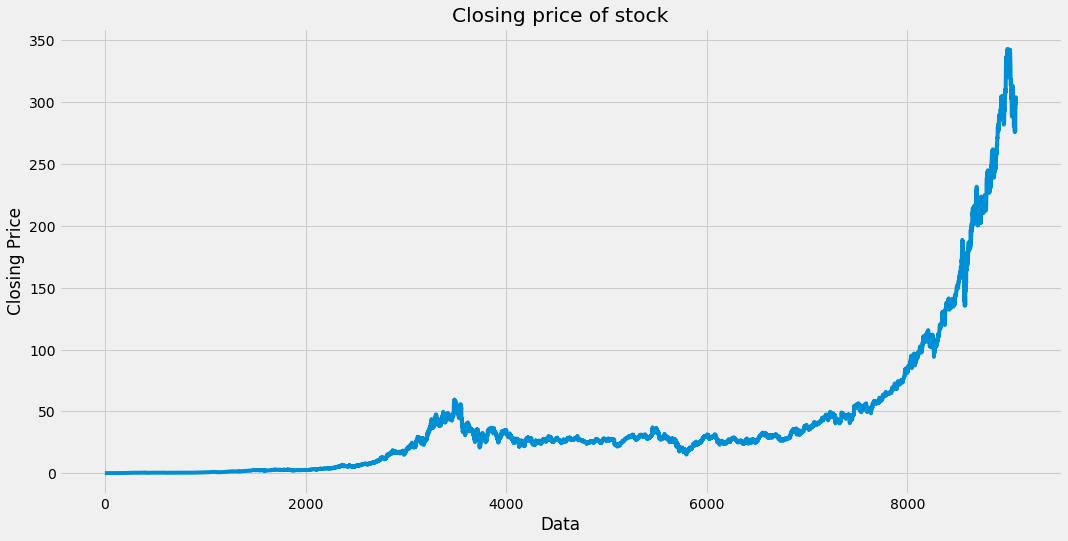

In [4]:
#visualize the closing prices
plt.figure(figsize=(16,8))
plt.title("Closing price of stock")
plt.plot(df["Close"])
plt.xlabel("Data")
plt.ylabel("Closing Price")
plt.show()

In [5]:
#create new database with only required coloumns
data = df.filter(["Close"])

In [6]:
data

,Close
0,0.097222
1,0.100694
2,0.102431
3,0.099826
4,0.098090
...,...
9078,300.429993
9079,299.160004
9080,304.059998
9081,299.489990


In [7]:
dataset=data.values

In [8]:
dataset

array([[9.72220000e-02],
       [1.00694000e-01],
       [1.02431000e-01],
       ...,
       [3.04059998e+02],
       [2.99489990e+02],
       [3.04100006e+02]])

In [9]:
training_data_len = math.ceil(len(dataset) *.8)
training_data_len

7267

In [10]:
#scale the data
scaler=StandardScaler() 
scaled_data=scaler.fit_transform(dataset)
print("MEAN of processed data: ",scaled_data.mean())
print("Standard deviation of processed data: ",scaled_data.std())

MEAN of processed data:  1.0013153162753806e-16
Standard deviation of processed data:  1.0


In [11]:
scaled_data

array([[-0.69063008],
       [-0.69057193],
       [-0.69054284],
       ...,
       [ 4.39991192],
       [ 4.32337683],
       [ 4.40058194]])

In [12]:
#create the training data
#create scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#split the data to x_train and y_train
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i])
  y_train.append(train_data[i])

In [13]:
#convert x_train and y_train into numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)
x_train.shape

(7207, 60, 1)

In [14]:
#reshape the data
print("x_train shape before reshaping",x_train.shape)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) #np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print("x_train shape after reshaping",x_train.shape)

x_train shape before reshaping (7207, 60, 1)
x_train shape after reshaping (7207, 60, 1)


In [15]:
#build LSTM model
model= Sequential()
model.add(LSTM(200,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(200,return_sequences=False))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(1)) 

In [16]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 200)           161600    
                                                                 
 lstm_1 (LSTM)               (None, 200)               320800    
                                                                 
 dense (Dense)               (None, 100)               20100     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 507,601
Trainable params: 507,601
Non-trainable params: 0
_________________________________________________________________


In [18]:
#train the model
history = model.fit(x_train,y_train,epochs=5)

Epoch 1/5
226/226 [==============================] - 37s 138ms/step - loss: 0.0027
Epoch 2/5
226/226 [==============================] - 28s 124ms/step - loss: 2.4222e-04
Epoch 3/5
226/226 [==============================] - 29s 127ms/step - loss: 2.1865e-04
Epoch 4/5
226/226 [==============================] - 29s 126ms/step - loss: 1.9101e-04
Epoch 5/5
226/226 [==============================] - 29s 129ms/step - loss: 1.7229e-04


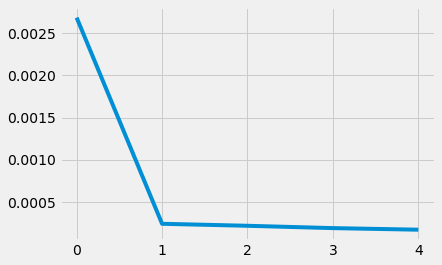

In [19]:
plt.plot(history.history['loss'])

In [20]:
#create the testing dataset
#createt new array
test_data=scaled_data[training_data_len-60:, :]
#create the dataset x_test and y_test
x_test=[]
y_test=dataset[training_data_len: , :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [21]:
#convert the data to numpy 
x_test=np.array(x_test)

In [22]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [23]:
#get the model predicted value
predictions =model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
print(predictions)

57/57 [==============================] - 4s 44ms/step
[[ 45.83472 ]
 [ 45.89725 ]
 [ 46.057755]
 ...
 [252.67809 ]
 [256.02417 ]
 [258.18854 ]]
